# Financial Planning with APIs and Simulations

In this Challenge, you’ll create two financial analysis tools by using a single Jupyter notebook:

Part 1: A financial planner for emergencies. The members will be able to use this tool to visualize their current savings. The members can then determine if they have enough reserves for an emergency fund.

Part 2: A financial planner for retirement. This tool will forecast the performance of their retirement portfolio in 30 years. To do this, the tool will make an Alpaca API call via the Alpaca SDK to get historical price data for use in Monte Carlo simulations.

You’ll use the information from the Monte Carlo simulation to answer questions about the portfolio in your Jupyter notebook.



In [17]:
# Import the required libraries and dependencies
import os
import requests
import json
import numpy as np
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [20]:
# Load the environment variables from the .env file by calling the load_dotenv function
load_dotenv()

True

## Part 1: Create a Financial Planner for Emergencies

### Evaluate the Cryptocurrency Wallet by Using the Requests Library

In this section, you’ll determine the current value of a member’s cryptocurrency wallet. You’ll collect the current prices for the Bitcoin and Ethereum cryptocurrencies by using the Python Requests library. For the prototype, you’ll assume that the member holds the 1.2 Bitcoins (BTC) and 5.3 Ethereum coins (ETH). To do all this, complete the following steps:

1. Create a variable named `monthly_income`, and set its value to `12000`.

2. Use the Requests library to get the current price (in US dollars) of Bitcoin (BTC) and Ethereum (ETH) by using the API endpoints that the starter code supplies.

3. Navigate the JSON response object to access the current price of each coin, and store each in a variable.

    > **Hint** Note the specific identifier for each cryptocurrency in the API JSON response. The Bitcoin identifier is `1`, and the Ethereum identifier is `1027`.

4. Calculate the value, in US dollars, of the current amount of each cryptocurrency and of the entire cryptocurrency wallet.



In [21]:
# The current number of coins for each cryptocurrency asset held in the portfolio.
btc_coins = 1.2
eth_coins = 5.3

#### Step 1: Create a variable named `monthly_income`, and set its value to `12000`.

In [22]:
# The monthly amount for the member's household income
# YOUR CODE HERE
monthly_income = 12000

#### Review the endpoint URLs for the API calls to Free Crypto API in order to get the current pricing information for both BTC and ETH.

In [23]:
# The Free Crypto API Call endpoint URLs for the held cryptocurrency assets
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

#### Step 2. Use the Requests library to get the current price (in US dollars) of Bitcoin (BTC) and Ethereum (ETH) by using the API endpoints that the starter code supplied.

In [24]:
# Using the Python requests library, make an API call to access the current price of BTC
btc_response = requests.get(btc_url)
btc_data = btc_response.json()

# Use the json.dumps function to review the response data from the API call
# Use the indent and sort_keys parameters to make the response object readable
# YOUR CODE HERE
btc_data_pretty = json.dumps(btc_data, indent=4, sort_keys=True)
print(btc_data_pretty)

{
    "data": {
        "1": {
            "circulating_supply": 19719384,
            "id": 1,
            "last_updated": 1720054097,
            "max_supply": 21000000,
            "name": "Bitcoin",
            "quotes": {
                "USD": {
                    "market_cap": 1191015988779,
                    "percent_change_1h": 0.26895304586428,
                    "percent_change_24h": -2.92024442023164,
                    "percent_change_7d": -0.802810800805491,
                    "percentage_change_1h": 0.26895304586428,
                    "percentage_change_24h": -2.92024442023164,
                    "percentage_change_7d": -0.802810800805491,
                    "price": 60355.0,
                    "volume_24h": 29186565118
                }
            },
            "rank": 1,
            "symbol": "BTC",
            "total_supply": 19719384,
            "website_slug": "bitcoin"
        }
    },
    "metadata": {
        "error": null,
        "num_cryptocurren

In [25]:
# Using the Python requests library, make an API call to access the current price ETH
eth_response = requests.get(eth_url)
eth_data = eth_response.json()

# Use the json.dumps function to review the response data from the API call
# Use the indent and sort_keys parameters to make the response object readable
# YOUR CODE HERE
eth_data_pretty = json.dumps(eth_data, indent=4, sort_keys=True)
print(eth_data_pretty)

{
    "data": {
        "1027": {
            "circulating_supply": 120193480,
            "id": 1027,
            "last_updated": 1720054077,
            "max_supply": 120193480,
            "name": "Ethereum",
            "quotes": {
                "USD": {
                    "market_cap": 397623417850,
                    "percent_change_1h": 0.382061361839592,
                    "percent_change_24h": -3.43768369981738,
                    "percent_change_7d": -1.84595833100234,
                    "percentage_change_1h": 0.382061361839592,
                    "percentage_change_24h": -3.43768369981738,
                    "percentage_change_7d": -1.84595833100234,
                    "price": 3307.13,
                    "volume_24h": 15230015864
                }
            },
            "rank": 2,
            "symbol": "ETH",
            "total_supply": 120193480,
            "website_slug": "ethereum"
        }
    },
    "metadata": {
        "error": null,
        "num_cr

#### Step 3: Navigate the JSON response object to access the current price of each coin, and store each in a variable.

In [26]:
# Navigate the BTC response object to access the current price of BTC
btc_price = btc_data["data"]["1"]["quotes"]["USD"]["price"]

# Print the current price of BTC
# YOUR CODE HERE
print(f"The current price of BTC: ${btc_price}")

The current price of BTC: $60355.0


In [27]:
# Navigate the BTC response object to access the current price of ETH
eth_price = eth_data["data"]["1027"]["quotes"]["USD"]["price"]

# Print the current price of ETH
# YOUR CODE HERE
print(f"The current price of ETH: ${eth_price}")

The current price of ETH: $3307.13


### Step 4: Calculate the value, in US dollars, of the current amount of each cryptocurrency and of the entire cryptocurrency wallet.

In [28]:
# Compute the current value of the BTC holding 
btc_value = btc_price * btc_coins

# Print current value of your holding in BTC
# YOUR CODE HERE
print(btc_value)

72426.0


In [29]:
# Compute the current value of the ETH holding 
eth_value = eth_price * eth_coins

# Print current value of your holding in ETH
# YOUR CODE HERE
print(eth_value)

17527.789


In [30]:
# Compute the total value of the cryptocurrency wallet
# Add the value of the BTC holding to the value of the ETH holding
total_crypto_wallet = btc_value + eth_value

# Print current cryptocurrency wallet balance
# YOUR CODE HERE
print(f"The current cryptocurrency wallet balance: ${total_crypto_wallet}.")

The current cryptocurrency wallet balance: $89953.789.


### Evaluate the Stock and Bond Holdings by Using the Alpaca SDK

In this section, you’ll determine the current value of a member’s stock and bond holdings. You’ll make an API call to Alpaca via the Alpaca SDK to get the current closing prices of the SPDR S&P 500 ETF Trust (ticker: SPY) and of the iShares Core US Aggregate Bond ETF (ticker: AGG). For the prototype, assume that the member holds 110 shares of SPY, which represents the stock portion of their portfolio, and 200 shares of AGG, which represents the bond portion. To do all this, complete the following steps:

1. In the `Starter_Code` folder, create an environment file (`.env`) to store the values of your Alpaca API key and Alpaca secret key.

2. Set the variables for the Alpaca API and secret keys. Using the Alpaca SDK, create the Alpaca `tradeapi.REST` object. In this object, include the parameters for the Alpaca API key, the secret key, and the version number.

3. Set the following parameters for the Alpaca API call:

    - `tickers`: Use the tickers for the member’s stock and bond holdings.

    - `timeframe`: Use a time frame of one day.

    - `start_date` and `end_date`: Use the same date for these parameters, and format them with the date of the previous weekday (or `2020-08-07`). This is because you want the one closing price for the most-recent trading day.

4. Get the current closing prices for `SPY` and `AGG` by using the Alpaca `get_bars` function. Format the response as a Pandas DataFrame by including the `df` property at the end of the `get_bars` function.

5. Navigating the Alpaca response DataFrame, select the `SPY` and `AGG` closing prices, and store them as variables.

6. Calculate the value, in US dollars, of the current amount of shares in each of the stock and bond portions of the portfolio, and print the results.


#### Review the total number of shares held in both (SPY) and (AGG).

In [31]:
# Current amount of shares held in both the stock (SPY) and bond (AGG) portion of the portfolio.
spy_shares = 110
agg_shares = 200

#### Step 1: In the `Starter_Code` folder, create an environment file (`.env`) to store the values of your Alpaca API key and Alpaca secret key.

#### Step 2: Set the variables for the Alpaca API and secret keys. Using the Alpaca SDK, create the Alpaca `tradeapi.REST` object. In this object, include the parameters for the Alpaca API key, the secret key, and the version number.

In [32]:
# Set the variables for the Alpaca API and secret keys
# YOUR CODE HERE
alpaca_api_key = os.getenv("Alpaca_key")
alpaca_secret_key = os.getenv("Alpaca_secret")

# Create the Alpaca tradeapi.REST object
# YOUR CODE HERE
alpaca = tradeapi.REST(alpaca_api_key, alpaca_secret_key, api_version = "v2")

#### Step 3: Set the following parameters for the Alpaca API call:

- `tickers`: Use the tickers for the member’s stock and bond holdings.

- `timeframe`: Use a time frame of one day.

- `start_date` and `end_date`: Use the same date for these parameters, and format them with the date of the previous weekday (or `2020-08-07`). This is because you want the one closing price for the most-recent trading day.


In [33]:
# Set the tickers for both the bond and stock portion of the portfolio
# YOUR CODE HERE
tickers = ["SPY", "AGG"]

# Set timeframe to 1Day
# YOUR CODE HERE
timeframe = "1Day"

# Format current date as ISO format
# Set both the start and end date at the date of your prior weekday 
# This will give you the closing price of the previous trading day
# Alternatively you can use a start and end date of 2020-08-07
# YOUR CODE HERE
start_date = pd.Timestamp("2024-06-17", tz = "America/New_York").isoformat()
end_date = pd.Timestamp("2024-06-21", tz = "America/New_York").isoformat()

#### Step 4: Get the current closing prices for `SPY` and `AGG` by using the Alpaca `get_bars` function. Format the response as a Pandas DataFrame by including the `df` property at the end of the `get_bars` function.

In [34]:
# Use the Alpaca get_bars function to get current closing prices the portfolio
# Be sure to set the `df` properly after the function to format the response object as a DataFrame
# YOUR CODE HERE
current_close_prices = alpaca.get_bars(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

# Reorganize the DataFrame
# Separate ticker data
# YOUR CODE HERE
SPY = current_close_prices[current_close_prices['symbol']=='SPY'].drop('symbol', axis=1)
AGG = current_close_prices[current_close_prices['symbol']=='AGG'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
# YOUR CODE HERE
current_close_prices = pd.concat([SPY, AGG], axis=1, keys=["SPY", "AGG"])

# Review the first 5 rows of the Alpaca DataFrame
# YOUR CODE HERE
current_close_prices.head()

SPY                                        \
                            close    high       low trade_count    open   
timestamp                                                                 
2024-06-17 04:00:00+00:00  547.10  548.53  541.6072      402255  542.08   
2024-06-18 04:00:00+00:00  548.49  548.62  546.7300      324668  547.16   
2024-06-20 04:00:00+00:00  547.00  550.12  545.1800      470269  549.44   
2024-06-21 04:00:00+00:00  544.51  545.65  543.0200      392335  544.40   

                                                   AGG                  \
                             volume        vwap  close   high      low   
timestamp                                                                
2024-06-17 04:00:00+00:00  55839457  545.443420  97.57  97.60  97.4450   
2024-06-18 04:00:00+00:00  41376417  547.734081  97.92  98.04  97.6754   
2024-06-20 04:00:00+00:00  70328226  547.551268  97.75  97.77  97.5150   
2024-06-21 04:00:00+00:00  64513859  544.537789  97.76  97.98  97.6450   

                                                                  
                          trade_count   open   volume       vwap  
timestamp                                                         
2024-06-17 04:00:00+00:00       21488  97.57  5265075  97.531413  
2024-06-18 04:00:00+00:00       24614  97.70  7030650  97.889335  
2024-06-20 04:00:00+00:00       17833  97.55  5621633  97.685342  
2024-06-21 04:00:00+00:00       18152  97.89  4715500  97.748395

#### Step 5: Navigating the Alpaca response DataFrame, select the `SPY` and `AGG` closing prices, and store them as variables.

In [35]:
# Access the closing price for AGG from the Alpaca DataFrame
# Converting the value to a floating point number
agg_close_price = current_close_prices["AGG"]["close"].to_frame()

# Print the AGG closing price
# YOUR CODE HERE
agg_close_price

,close
timestamp,
2024-06-17 04:00:00+00:00,97.57
2024-06-18 04:00:00+00:00,97.92
2024-06-20 04:00:00+00:00,97.75
2024-06-21 04:00:00+00:00,97.76


In [36]:
# Access the closing price for SPY from the Alpaca DataFrame
# Converting the value to a floating point number
spy_close_price = current_close_prices["SPY"]["close"].to_frame()

# Print the SPY closing price
# YOUR CODE HERE
spy_close_price

,close
timestamp,
2024-06-17 04:00:00+00:00,547.10
2024-06-18 04:00:00+00:00,548.49
2024-06-20 04:00:00+00:00,547.00
2024-06-21 04:00:00+00:00,544.51


#### Step 6: Calculate the value, in US dollars, of the current amount of shares in each of the stock and bond portions of the portfolio, and print the results.

In [37]:
# Calculate the current value of the bond portion of the portfolio
agg_value =  agg_close_price["close"]["2024-06-21"] * agg_shares

# Print the current value of the bond portfolio
# YOUR CODE HERE
agg_value

timestamp
2024-06-21 04:00:00+00:00    19552.0
Name: close, dtype: float64

In [38]:
# Calculate the current value of the stock portion of the portfolio
spy_value = spy_close_price["close"]["2024-06-21"] * spy_shares

# Print the current value of the stock portfolio
# YOUR CODE HERE
spy_value

timestamp
2024-06-21 04:00:00+00:00    59896.1
Name: close, dtype: float64

In [39]:
# Calculate the total value of the stock and bond portion of the portfolio
total_stocks_bonds = agg_value + spy_value

# Print the current balance of the stock and bond portion of the portfolio
# YOUR CODE HERE
total_stocks_bonds

timestamp
2024-06-21 04:00:00+00:00    79448.1
Name: close, dtype: float64

In [40]:
# Calculate the total value of the member's entire savings portfolio
# Add the value of the cryptocurrency wallet to the value of the total stocks and bonds
total_portfolio = total_stocks_bonds + total_crypto_wallet

# Print current cryptocurrency wallet balance
# YOUR CODE HERE
total_portfolio

timestamp
2024-06-21 04:00:00+00:00    169401.889
Name: close, dtype: float64

### Evaluate the Emergency Fund

In this section, you’ll use the valuations for the cryptocurrency wallet and for the stock and bond portions of the portfolio to determine if the credit union member has enough savings to build an emergency fund into their financial plan. To do this, complete the following steps:

1. Create a Python list named `savings_data` that has two elements. The first element contains the total value of the cryptocurrency wallet. The second element contains the total value of the stock and bond portions of the portfolio.

2. Use the `savings_data` list to create a Pandas DataFrame named `savings_df`, and then display this DataFrame. The function to create the DataFrame should take the following three parameters:

    - `savings_data`: Use the list that you just created.

    - `columns`: Set this parameter equal to a Python list with a single value called `amount`.

    - `index`: Set this parameter equal to a Python list with the values of `crypto` and `stock/bond`.

3. Use the `savings_df` DataFrame to plot a pie chart that visualizes the composition of the member’s portfolio. The y-axis of the pie chart uses `amount`. Be sure to add a title.

4. Using Python, determine if the current portfolio has enough to create an emergency fund as part of the member’s financial plan. Ideally, an emergency fund should equal to three times the member’s monthly income. To do this, implement the following steps:

    1. Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of $12000. (You set this earlier in Part 1).

    2. Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

        1. If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

        2. Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

        3. Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)


#### Step 1: Create a Python list named `savings_data` that has two elements. The first element contains the total value of the cryptocurrency wallet. The second element contains the total value of the stock and bond portions of the portfolio.

In [41]:
# Consolidate financial assets data into a Python list
# YOUR CODE HERE
savings_data = [total_crypto_wallet, total_portfolio.values[0]]

# Review the Python list savings_data
# YOUR CODE HERE
savings_data

[89953.789, 169401.88900000002]

#### Step 2: Use the `savings_data` list to create a Pandas DataFrame named `savings_df`, and then display this DataFrame. The function to create the DataFrame should take the following three parameters:

- `savings_data`: Use the list that you just created.

- `columns`: Set this parameter equal to a Python list with a single value called `amount`.

- `index`: Set this parameter equal to a Python list with the values of `crypto` and `stock/bond`.


In [42]:
# Create a Pandas DataFrame called savings_df 
# YOUR CODE HERE
savings_df = pd.DataFrame(savings_data, columns=['amount'], index=['crypto', 'stock/bond'])

# Display the savings_df DataFrame
# YOUR CODE HERE
savings_df

,amount
crypto,89953.789
stock/bond,169401.889


#### Step 3: Use the `savings_df` DataFrame to plot a pie chart that visualizes the composition of the member’s portfolio. The y-axis of the pie chart uses `amount`. Be sure to add a title.

array([<Axes: ylabel='amount'>], dtype=object)

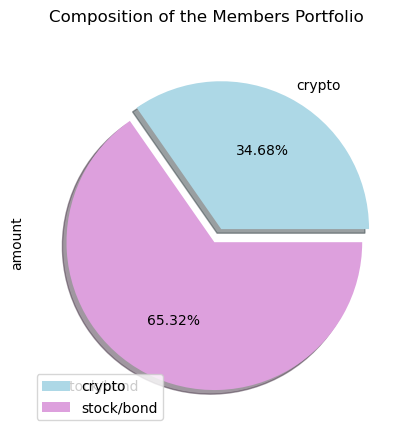

In [43]:
# Plot the total value of the member's portfolio (crypto and stock/bond) in a pie chart
# YOUR CODE HERE
savings_df.plot(kind = "pie", subplots = True, title = "Composition of the Members Portfolio",
               colors = ["lightblue", "plum"], autopct = "%.2f%%", explode = [0.1, 0], shadow = True)

#### Step 4: Using Python, determine if the current portfolio has enough to create an emergency fund as part of the member’s financial plan. Ideally, an emergency fund should equal to three times the member’s monthly income. To do this, implement the following steps:

Step 1. Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of 12000. (You set this earlier in Part 1).

Step 2. Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

* If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

* Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

* Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)


##### Step 4-1: Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of 12000. (You set this earlier in Part 1).

In [44]:
# Create a variable named emergency_fund_value
# YOUR CODE HERE
emergency_fund_value = monthly_income * 3

##### Step 4-2: Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

* If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

* Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

* Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)

In [45]:
# Evaluate the possibility of creating an emergency fund with 3 conditions:
# YOUR CODE HERE
if total_portfolio.values[0] > emergency_fund_value:
    print("Congradulations that you have enough money in this fund.")
elif total_portfolio.values[0] == emergency_fund_value:
    print("Congradulations that you are reaching this important financial goal.")
else:
    print(f"You are ${emergency_fund_value - total_portfolio.values[0]} away from reaching the goal.")

Congradulations that you have enough money in this fund.


## Part 2: Create a Financial Planner for Retirement

### Create the Monte Carlo Simulation

In this section, you’ll use the MCForecastTools library to create a Monte Carlo simulation for the member’s savings portfolio. To do this, complete the following steps:

1. Make an API call via the Alpaca SDK to get 3 years of historical closing prices for a traditional 60/40 portfolio split: 60% stocks (SPY) and 40% bonds (AGG).

2. Run a Monte Carlo simulation of 500 samples and 30 years for the 60/40 portfolio, and then plot the results.The following image shows the overlay line plot resulting from a simulation with these characteristics. However, because a random number generator is used to run each live Monte Carlo simulation, your image will differ slightly from this exact image:

![A screenshot depicts the resulting plot.](Images/5-4-monte-carlo-line-plot.png)

3. Plot the probability distribution of the Monte Carlo simulation. Plot the probability distribution of the Monte Carlo simulation. The following image shows the histogram plot resulting from a simulation with these characteristics. However, because a random number generator is used to run each live Monte Carlo simulation, your image will differ slightly from this exact image:

![A screenshot depicts the histogram plot.](Images/5-4-monte-carlo-histogram.png)

4. Generate the summary statistics for the Monte Carlo simulation.



#### Step 1: Make an API call via the Alpaca SDK to get 3 years of historical closing prices for a traditional 60/40 portfolio split: 60% stocks (SPY) and 40% bonds (AGG).

In [46]:
# Use the Alpaca get_bars function to make the API call to get the 3 years worth of pricing data
# The tickers and timeframe parameters should have been set in Part 1 of this activity 
# The start and end dates should be updated with the information set above
# Remember to add the df property to the end of the call so the response is returned as a DataFrame
# YOUR CODE HERE
tickers = ["SPY", "AGG"]
time_frame = "1Day"
start_date = pd.Timestamp("2018-06-17", tz = "America/New_York").isoformat()
end_date = pd.Timestamp("2021-06-17", tz = "America/New_York").isoformat()

df = alpaca.get_bars(tickers, time_frame, start = start_date, end = end_date).df 
df

,close,high,low,trade_count,open,volume,vwap,symbol
timestamp,,,,,,,,
2018-06-18 04:00:00+00:00,105.900,105.9300,105.80,10590,105.93,2404726,105.865054,AGG
2018-06-19 04:00:00+00:00,106.010,106.1100,105.98,10343,106.05,2249130,106.040961,AGG
2018-06-20 04:00:00+00:00,105.805,106.0600,105.79,9221,106.06,2447740,105.884756,AGG
2018-06-21 04:00:00+00:00,105.840,105.9599,105.81,11286,105.88,3017434,105.869379,AGG
2018-06-22 04:00:00+00:00,105.940,105.9400,105.80,7831,105.82,2070868,105.900141,AGG
...,...,...,...,...,...,...,...,...
2021-06-11 04:00:00+00:00,424.310,424.4300,422.82,257702,424.20,46822811,423.780488,SPY
2021-06-14 04:00:00+00:00,425.260,425.3700,423.10,279892,424.43,43360599,424.118417,SPY
2021-06-15 04:00:00+00:00,424.480,425.4600,423.54,301971,425.42,52379036,424.518221,SPY


In [47]:
# Reorganize the DataFrame
# Separate ticker data
# YOUR CODE HERE
SPY = df[df["symbol"] == "SPY"].drop(columns = "symbol")
SPY

,close,high,low,trade_count,open,volume,vwap
timestamp,,,,,,,
2018-06-18 04:00:00+00:00,276.59,276.700,274.95,221100,275.49,53795470,276.158830
2018-06-19 04:00:00+00:00,275.48,275.750,273.53,337431,274.00,99299985,274.941876
2018-06-20 04:00:00+00:00,276.01,276.720,275.59,212279,276.27,55038477,276.062498
2018-06-21 04:00:00+00:00,274.24,275.980,273.68,289341,275.96,72830642,274.635100
2018-06-22 04:00:00+00:00,274.76,275.785,274.49,231377,275.66,58141958,275.102782
...,...,...,...,...,...,...,...
2021-06-11 04:00:00+00:00,424.31,424.430,422.82,257702,424.20,46822811,423.780488
2021-06-14 04:00:00+00:00,425.26,425.370,423.10,279892,424.43,43360599,424.118417
2021-06-15 04:00:00+00:00,424.48,425.460,423.54,301971,425.42,52379036,424.518221


In [48]:
# Reorganize the DataFrame
# Separate ticker data
# YOUR CODE HERE
AGG = df[df["symbol"] == "AGG"].drop(columns = "symbol")
AGG

,close,high,low,trade_count,open,volume,vwap
timestamp,,,,,,,
2018-06-18 04:00:00+00:00,105.900,105.9300,105.800,10590,105.930,2404726,105.865054
2018-06-19 04:00:00+00:00,106.010,106.1100,105.980,10343,106.050,2249130,106.040961
2018-06-20 04:00:00+00:00,105.805,106.0600,105.790,9221,106.060,2447740,105.884756
2018-06-21 04:00:00+00:00,105.840,105.9599,105.810,11286,105.880,3017434,105.869379
2018-06-22 04:00:00+00:00,105.940,105.9400,105.800,7831,105.820,2070868,105.900141
...,...,...,...,...,...,...,...
2021-06-11 04:00:00+00:00,115.230,115.3200,115.160,15043,115.310,4136735,115.240960
2021-06-14 04:00:00+00:00,114.940,115.1800,114.935,11468,115.180,3603949,115.006060
2021-06-15 04:00:00+00:00,114.990,115.0200,114.870,16619,114.900,9432928,114.960417


In [49]:
# Concatenate the ticker DataFrames
# YOUR CODE HERE
df_alpaca_3years = pd.concat([SPY, AGG], axis = "columns", keys = ["SPY", "AGG"])
df_alpaca_3years

SPY                                       \
                            close     high     low trade_count    open   
timestamp                                                                
2018-06-18 04:00:00+00:00  276.59  276.700  274.95      221100  275.49   
2018-06-19 04:00:00+00:00  275.48  275.750  273.53      337431  274.00   
2018-06-20 04:00:00+00:00  276.01  276.720  275.59      212279  276.27   
2018-06-21 04:00:00+00:00  274.24  275.980  273.68      289341  275.96   
2018-06-22 04:00:00+00:00  274.76  275.785  274.49      231377  275.66   
...                           ...      ...     ...         ...     ...   
2021-06-11 04:00:00+00:00  424.31  424.430  422.82      257702  424.20   
2021-06-14 04:00:00+00:00  425.26  425.370  423.10      279892  424.43   
2021-06-15 04:00:00+00:00  424.48  425.460  423.54      301971  425.42   
2021-06-16 04:00:00+00:00  422.11  424.870  419.92      649282  424.63   
2021-06-17 04:00:00+00:00  421.97  423.020  419.32      571246  421.67   

                                                     AGG                     \
                             volume        vwap    close      high      low   
timestamp                                                                     
2018-06-18 04:00:00+00:00  53795470  276.158830  105.900  105.9300  105.800   
2018-06-19 04:00:00+00:00  99299985  274.941876  106.010  106.1100  105.980   
2018-06-20 04:00:00+00:00  55038477  276.062498  105.805  106.0600  105.790   
2018-06-21 04:00:00+00:00  72830642  274.635100  105.840  105.9599  105.810   
2018-06-22 04:00:00+00:00  58141958  275.102782  105.940  105.9400  105.800   
...                             ...         ...      ...       ...      ...   
2021-06-11 04:00:00+00:00  46822811  423.780488  115.230  115.3200  115.160   
2021-06-14 04:00:00+00:00  43360599  424.118417  114.940  115.1800  114.935   
2021-06-15 04:00:00+00:00  52379036  424.518221  114.990  115.0200  114.870   
2021-06-16 04:00:00+00:00  82346591  422.481790  114.620  115.1285  114.510   
2021-06-17 04:00:00+00:00  92368532  421.892916  114.980  115.2500  114.785   

                                                                     
                          trade_count     open   volume        vwap  
timestamp                                                            
2018-06-18 04:00:00+00:00       10590  105.930  2404726  105.865054  
2018-06-19 04:00:00+00:00       10343  106.050  2249130  106.040961  
2018-06-20 04:00:00+00:00        9221  106.060  2447740  105.884756  
2018-06-21 04:00:00+00:00       11286  105.880  3017434  105.869379  
2018-06-22 04:00:00+00:00        7831  105.820  2070868  105.900141  
...                               ...      ...      ...         ...  
2021-06-11 04:00:00+00:00       15043  115.310  4136735  115.240960  
2021-06-14 04:00:00+00:00       11468  115.180  3603949  115.006060  
2021-06-15 04:00:00+00:00       16619  114.900  9432928  114.960417  
2021-06-16 04:00:00+00:00       23931  115.070  9758916  114.814610  
2021-06-17 04:00:00+00:00       24469  114.792  7909584  115.043605  

[756 rows x 14 columns]

In [50]:
# Display both the first and last five rows of the DataFrame
df_alpaca_3years["SPY"]

,close,high,low,trade_count,open,volume,vwap
timestamp,,,,,,,
2018-06-18 04:00:00+00:00,276.59,276.700,274.95,221100,275.49,53795470,276.158830
2018-06-19 04:00:00+00:00,275.48,275.750,273.53,337431,274.00,99299985,274.941876
2018-06-20 04:00:00+00:00,276.01,276.720,275.59,212279,276.27,55038477,276.062498
2018-06-21 04:00:00+00:00,274.24,275.980,273.68,289341,275.96,72830642,274.635100
2018-06-22 04:00:00+00:00,274.76,275.785,274.49,231377,275.66,58141958,275.102782
...,...,...,...,...,...,...,...
2021-06-11 04:00:00+00:00,424.31,424.430,422.82,257702,424.20,46822811,423.780488
2021-06-14 04:00:00+00:00,425.26,425.370,423.10,279892,424.43,43360599,424.118417
2021-06-15 04:00:00+00:00,424.48,425.460,423.54,301971,425.42,52379036,424.518221


In [51]:
# Set start and end dates of 3 years back from your current date
# Alternatively, you can use an end date of 2020-08-07 and work 3 years back from that date 
# YOUR CODE HERE
SPY_AGG_3year = MCSimulation(portfolio_data = df_alpaca_3years,
                       weights = [0.6, 0.4],
                       num_simulation = 500,
                       num_trading_days = 252 * 3)

In [52]:
SPY_AGG_3year.portfolio_data.head()

SPY                                       \
                            close     high     low trade_count    open   
timestamp                                                                
2018-06-18 04:00:00+00:00  276.59  276.700  274.95      221100  275.49   
2018-06-19 04:00:00+00:00  275.48  275.750  273.53      337431  274.00   
2018-06-20 04:00:00+00:00  276.01  276.720  275.59      212279  276.27   
2018-06-21 04:00:00+00:00  274.24  275.980  273.68      289341  275.96   
2018-06-22 04:00:00+00:00  274.76  275.785  274.49      231377  275.66   

                                                                  AGG  \
                             volume        vwap daily_return    close   
timestamp                                                               
2018-06-18 04:00:00+00:00  53795470  276.158830          NaN  105.900   
2018-06-19 04:00:00+00:00  99299985  274.941876    -0.004013  106.010   
2018-06-20 04:00:00+00:00  55038477  276.062498     0.001924  105.805   
2018-06-21 04:00:00+00:00  72830642  274.635100    -0.006413  105.840   
2018-06-22 04:00:00+00:00  58141958  275.102782     0.001896  105.940   

                                                                          \
                               high     low trade_count    open   volume   
timestamp                                                                  
2018-06-18 04:00:00+00:00  105.9300  105.80       10590  105.93  2404726   
2018-06-19 04:00:00+00:00  106.1100  105.98       10343  106.05  2249130   
2018-06-20 04:00:00+00:00  106.0600  105.79        9221  106.06  2447740   
2018-06-21 04:00:00+00:00  105.9599  105.81       11286  105.88  3017434   
2018-06-22 04:00:00+00:00  105.9400  105.80        7831  105.82  2070868   

                                                    
                                 vwap daily_return  
timestamp                                           
2018-06-18 04:00:00+00:00  105.865054          NaN  
2018-06-19 04:00:00+00:00  106.040961     0.001039  
2018-06-20 04:00:00+00:00  105.884756    -0.001934  
2018-06-21 04:00:00+00:00  105.869379     0.000331  
2018-06-22 04:00:00+00:00  105.900141     0.000945

In [53]:
SPY_AGG_3year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.991582,1.002881,1.017975,0.996485,0.998289,0.984370,0.996882,1.000514,0.992654,1.022841,...,1.009388,0.994332,1.012509,1.002598,0.999030,0.995495,1.009366,1.004396,1.008167,1.001117
2,0.998595,1.010229,1.016303,1.003696,0.994524,0.985243,1.015565,1.006596,1.015007,1.023266,...,1.018120,0.999848,1.017313,0.996748,1.004307,0.990879,1.014866,1.007873,1.009817,1.009354
3,0.989959,1.005604,1.028674,0.996384,1.003125,0.996417,1.011270,1.007884,1.009764,1.028315,...,1.012953,0.997374,1.014071,1.001778,1.012864,0.998468,1.017876,1.007477,0.997128,1.005610
4,0.995173,0.999328,1.034372,1.012610,0.993807,1.000066,1.010763,0.997819,1.025208,1.026081,...,1.014180,0.994974,1.011223,0.997305,1.014016,1.011817,1.025521,1.001083,0.991490,1.016736
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
752,1.704007,1.057753,1.678735,1.456576,1.444436,1.408880,1.231787,0.974332,1.188439,1.808596,...,1.244911,1.209287,2.022439,0.970864,1.803000,1.233838,1.693708,1.167265,1.166724,1.787529
753,1.707066,1.050707,1.679985,1.457942,1.430282,1.415251,1.242337,0.956951,1.173478,1.833258,...,1.234227,1.219773,2.034658,0.967527,1.796608,1.234155,1.695597,1.158162,1.178003,1.822829
754,1.709471,1.042994,1.680625,1.461373,1.433015,1.406993,1.250204,0.959323,1.174091,1.815518,...,1.230637,1.230392,2.028286,0.978290,1.787453,1.233493,1.691139,1.168932,1.183607,1.816170
755,1.704064,1.054529,1.676923,1.469156,1.425736,1.401991,1.245856,0.966698,1.155343,1.817700,...,1.208101,1.211203,1.990905,0.974024,1.784900,1.240134,1.691492,1.162797,1.187995,1.812481


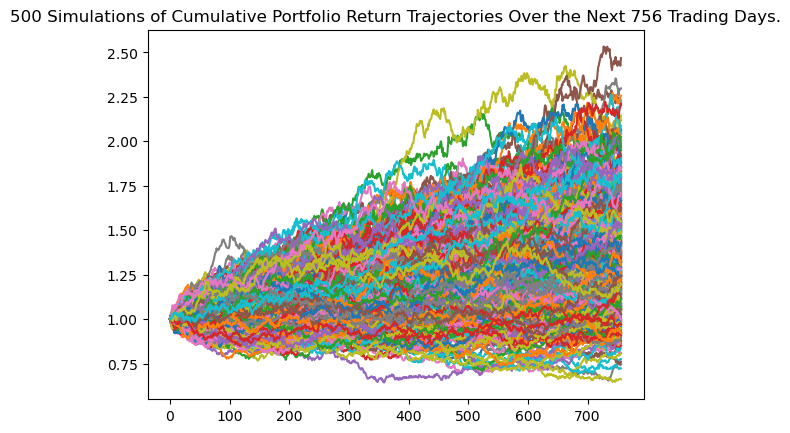

In [54]:
SPY_AGG_3year_plot = SPY_AGG_3year.plot_simulation()

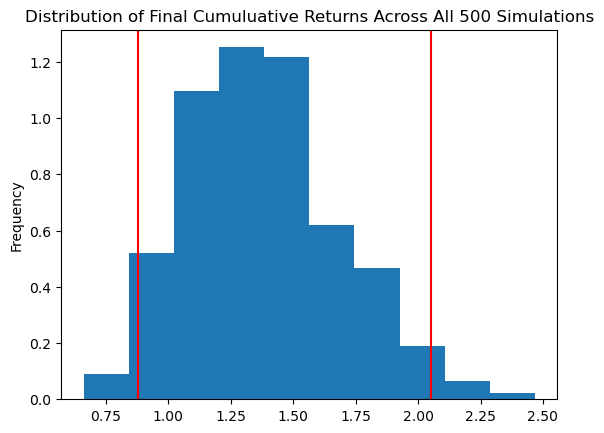

In [55]:
SPY_AGG_3year_dist_plot = SPY_AGG_3year.plot_distribution()

#### Step 2: Run a Monte Carlo simulation of 500 samples and 30 years for the 60/40 portfolio, and then plot the results.

In [56]:
df_alpaca_30years = pd.concat([SPY, AGG], axis = "columns", keys = ["SPY", "AGG"])
df_alpaca_30years

SPY                                       \
                            close     high     low trade_count    open   
timestamp                                                                
2018-06-18 04:00:00+00:00  276.59  276.700  274.95      221100  275.49   
2018-06-19 04:00:00+00:00  275.48  275.750  273.53      337431  274.00   
2018-06-20 04:00:00+00:00  276.01  276.720  275.59      212279  276.27   
2018-06-21 04:00:00+00:00  274.24  275.980  273.68      289341  275.96   
2018-06-22 04:00:00+00:00  274.76  275.785  274.49      231377  275.66   
...                           ...      ...     ...         ...     ...   
2021-06-11 04:00:00+00:00  424.31  424.430  422.82      257702  424.20   
2021-06-14 04:00:00+00:00  425.26  425.370  423.10      279892  424.43   
2021-06-15 04:00:00+00:00  424.48  425.460  423.54      301971  425.42   
2021-06-16 04:00:00+00:00  422.11  424.870  419.92      649282  424.63   
2021-06-17 04:00:00+00:00  421.97  423.020  419.32      571246  421.67   

                                                     AGG                     \
                             volume        vwap    close      high      low   
timestamp                                                                     
2018-06-18 04:00:00+00:00  53795470  276.158830  105.900  105.9300  105.800   
2018-06-19 04:00:00+00:00  99299985  274.941876  106.010  106.1100  105.980   
2018-06-20 04:00:00+00:00  55038477  276.062498  105.805  106.0600  105.790   
2018-06-21 04:00:00+00:00  72830642  274.635100  105.840  105.9599  105.810   
2018-06-22 04:00:00+00:00  58141958  275.102782  105.940  105.9400  105.800   
...                             ...         ...      ...       ...      ...   
2021-06-11 04:00:00+00:00  46822811  423.780488  115.230  115.3200  115.160   
2021-06-14 04:00:00+00:00  43360599  424.118417  114.940  115.1800  114.935   
2021-06-15 04:00:00+00:00  52379036  424.518221  114.990  115.0200  114.870   
2021-06-16 04:00:00+00:00  82346591  422.481790  114.620  115.1285  114.510   
2021-06-17 04:00:00+00:00  92368532  421.892916  114.980  115.2500  114.785   

                                                                     
                          trade_count     open   volume        vwap  
timestamp                                                            
2018-06-18 04:00:00+00:00       10590  105.930  2404726  105.865054  
2018-06-19 04:00:00+00:00       10343  106.050  2249130  106.040961  
2018-06-20 04:00:00+00:00        9221  106.060  2447740  105.884756  
2018-06-21 04:00:00+00:00       11286  105.880  3017434  105.869379  
2018-06-22 04:00:00+00:00        7831  105.820  2070868  105.900141  
...                               ...      ...      ...         ...  
2021-06-11 04:00:00+00:00       15043  115.310  4136735  115.240960  
2021-06-14 04:00:00+00:00       11468  115.180  3603949  115.006060  
2021-06-15 04:00:00+00:00       16619  114.900  9432928  114.960417  
2021-06-16 04:00:00+00:00       23931  115.070  9758916  114.814610  
2021-06-17 04:00:00+00:00       24469  114.792  7909584  115.043605  

[756 rows x 14 columns]

In [57]:
# Configure the Monte Carlo simulation to forecast 30 years cumulative returns
# The weights should be split 40% to AGG and 60% to SPY.
# Run 500 samples.
# YOUR CODE HERE
SPY_AGG_30year = MCSimulation(portfolio_data = df_alpaca_30years,
                       weights = [0.6, 0.4],
                       num_simulation = 500,
                       num_trading_days = 252 * 30)

# Review the simulation input data
# YOUR CODE HERE
SPY_AGG_30year.portfolio_data.head()

SPY                                       \
                            close     high     low trade_count    open   
timestamp                                                                
2018-06-18 04:00:00+00:00  276.59  276.700  274.95      221100  275.49   
2018-06-19 04:00:00+00:00  275.48  275.750  273.53      337431  274.00   
2018-06-20 04:00:00+00:00  276.01  276.720  275.59      212279  276.27   
2018-06-21 04:00:00+00:00  274.24  275.980  273.68      289341  275.96   
2018-06-22 04:00:00+00:00  274.76  275.785  274.49      231377  275.66   

                                                                  AGG  \
                             volume        vwap daily_return    close   
timestamp                                                               
2018-06-18 04:00:00+00:00  53795470  276.158830          NaN  105.900   
2018-06-19 04:00:00+00:00  99299985  274.941876    -0.004013  106.010   
2018-06-20 04:00:00+00:00  55038477  276.062498     0.001924  105.805   
2018-06-21 04:00:00+00:00  72830642  274.635100    -0.006413  105.840   
2018-06-22 04:00:00+00:00  58141958  275.102782     0.001896  105.940   

                                                                          \
                               high     low trade_count    open   volume   
timestamp                                                                  
2018-06-18 04:00:00+00:00  105.9300  105.80       10590  105.93  2404726   
2018-06-19 04:00:00+00:00  106.1100  105.98       10343  106.05  2249130   
2018-06-20 04:00:00+00:00  106.0600  105.79        9221  106.06  2447740   
2018-06-21 04:00:00+00:00  105.9599  105.81       11286  105.88  3017434   
2018-06-22 04:00:00+00:00  105.9400  105.80        7831  105.82  2070868   

                                                    
                                 vwap daily_return  
timestamp                                           
2018-06-18 04:00:00+00:00  105.865054          NaN  
2018-06-19 04:00:00+00:00  106.040961     0.001039  
2018-06-20 04:00:00+00:00  105.884756    -0.001934  
2018-06-21 04:00:00+00:00  105.869379     0.000331  
2018-06-22 04:00:00+00:00  105.900141     0.000945

In [58]:
# Run the Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE
SPY_AGG_30year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.983337,0.995418,1.006194,0.989466,0.977034,1.014056,1.010494,0.996822,1.001551,0.990146,...,0.989290,1.001302,1.002518,0.999041,0.996342,0.992852,0.997548,0.991720,1.001421,0.993347
2,0.991851,1.000489,1.002612,0.983447,0.976253,0.996860,1.004930,0.995521,0.991814,0.996721,...,1.002937,0.980707,0.997291,1.002393,1.001572,0.989313,0.999469,0.999058,1.002487,0.993355
3,0.994944,1.002665,1.005451,0.978404,0.992164,0.979048,1.002477,1.009131,0.983665,1.000362,...,1.012813,0.984989,0.992108,1.017142,1.003237,0.996940,0.993957,1.013212,1.010420,1.012284
4,0.989709,1.000277,1.004694,0.964590,0.993952,0.979130,0.995473,0.993736,0.978565,1.001313,...,1.028611,1.000790,1.000919,1.024535,1.003650,0.994546,0.994995,1.009837,1.014081,1.015350
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,32.866158,60.996253,15.283476,168.787538,12.567314,23.530756,7.071728,27.074804,14.289427,14.483319,...,2.836250,14.661608,6.983375,67.907664,38.868654,11.991378,40.568450,7.625912,22.441151,30.127634
7557,33.058921,61.300000,15.291692,169.306285,12.622664,23.140648,7.098719,27.346295,14.407414,14.504984,...,2.827707,14.765162,6.941283,67.455262,39.130210,12.018560,40.800994,7.572198,22.534579,30.348951
7558,33.096375,60.576214,15.549198,167.938712,12.584374,23.356357,7.091433,27.169580,14.382629,14.369972,...,2.791397,14.687786,7.028130,67.249355,39.226053,12.111565,41.124476,7.536215,22.648834,30.387775
7559,32.923972,60.391520,15.324778,165.994387,12.703528,23.523661,7.119712,27.377934,14.486756,14.226064,...,2.775771,14.447043,7.118878,67.371014,39.279593,12.042880,40.981944,7.463885,22.747473,30.118738


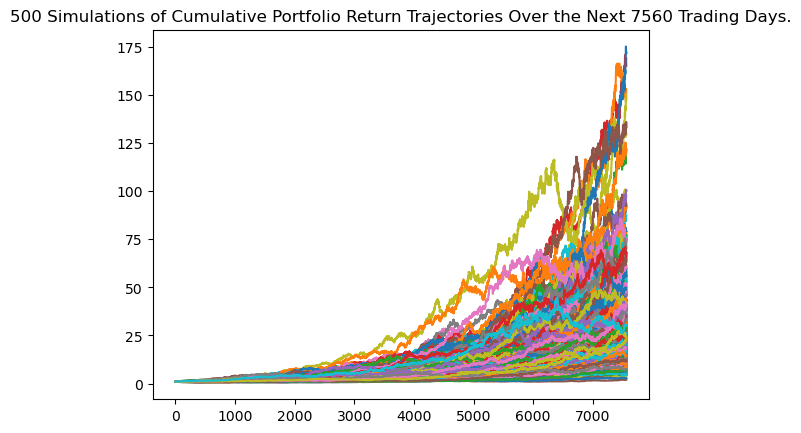

In [59]:
# Visualize the 30-year Monte Carlo simulation by creating an
# overlay line plot
# YOUR CODE HERE
SPY_AGG_30year_plot = SPY_AGG_30year.plot_simulation()

#### Step 3: Plot the probability distribution of the Monte Carlo simulation.

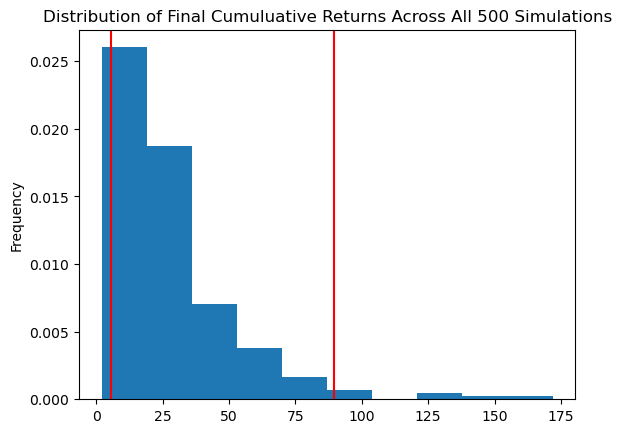

In [60]:
# Visualize the probability distribution of the 30-year Monte Carlo simulation 
# by plotting a histogram
# YOUR CODE HERE
SPY_AGG_30year_dist_plot = SPY_AGG_30year.plot_distribution()

#### Step 4: Generate the summary statistics for the Monte Carlo simulation.

In [61]:
mc_summary_statistic = SPY_AGG_30year.summarize_cumulative_return()

In [62]:
mc_summary_statistic

count           500.000000
mean             28.384926
std              23.534617
min               2.008294
25%              13.209586
50%              22.636629
75%              35.114538
max             171.840197
95% CI Lower      5.338318
95% CI Upper     89.483309
Name: 7560, dtype: float64

### Analyze the Retirement Portfolio Forecasts

Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the Monte Carlo simulation, answer the following question in your Jupyter notebook:

-  What are the lower and upper bounds for the expected value of the portfolio with a 95% confidence interval?


In [70]:
# Print the current balance of the stock and bond portion of the members portfolio
# YOUR CODE HERE
print(f'The current balance of the stock and bond portion of the members portfolio is:\
${savings_df.loc["stock/bond"].values[0]:.3f}')

The current balance of the stock and bond portion of the members portfolio is:$169401.889


In [74]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the 
# current stock/bond portfolio
ci_lower_thirty_cumulative_return = mc_summary_statistic[8] * savings_df.loc["stock/bond"].values[0]
ci_upper_thirty_cumulative_return = mc_summary_statistic[9] * savings_df.loc["stock/bond"].values[0]

# Print the result of your calculations
# YOUR CODE HERE
print(f"The range of the possible outcomes for the current stock/bond portfolio will end within in the range of\
 {ci_lower_thirty_cumulative_return:.3f} and {ci_upper_thirty_cumulative_return:.3f}.")

The range of the possible outcomes for the current stock/bond portfolio will end within in the range of 904321.191 and 15158641.515.


### Forecast Cumulative Returns in 10 Years

The CTO of the credit union is impressed with your work on these planning tools but wonders if 30 years is a long time to wait until retirement. So, your next task is to adjust the retirement portfolio and run a new Monte Carlo simulation to find out if the changes will allow members to retire earlier.

For this new Monte Carlo simulation, do the following: 

- Forecast the cumulative returns for 10 years from now. Because of the shortened investment horizon (30 years to 10 years), the portfolio needs to invest more heavily in the riskier asset&mdash;that is, stock&mdash;to help accumulate wealth for retirement. 

- Adjust the weights of the retirement portfolio so that the composition for the Monte Carlo simulation consists of 20% bonds and 80% stocks. 

- Run the simulation over 500 samples, and use the same data that the API call to Alpaca generated.

- Based on the new Monte Carlo simulation, answer the following questions in your Jupyter notebook:

    - Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the new Monte Carlo simulation, what are the lower and upper bounds for the expected value of the portfolio (with the new weights) with a 95% confidence interval?

    - Will weighting the portfolio more heavily toward stocks allow the credit union members to retire after only 10 years?


In [75]:
# Configure a Monte Carlo simulation to forecast 10 years cumulative returns
# The weights should be split 20% to AGG and 80% to SPY.
# Run 500 samples.
# YOUR CODE HERE
df_alpaca_10years = pd.concat([SPY, AGG], axis = "columns", keys = ["SPY", "AGG"])
df_alpaca_10years

SPY_AGG_10year = MCSimulation(portfolio_data = df_alpaca_10years,
                       weights = [0.8, 0.2],
                       num_simulation = 500,
                       num_trading_days = 252 * 10)

# Review the simulation input data
# YOUR CODE HERE
SPY_AGG_10year.portfolio_data

SPY                                       \
                            close     high     low trade_count    open   
timestamp                                                                
2018-06-18 04:00:00+00:00  276.59  276.700  274.95      221100  275.49   
2018-06-19 04:00:00+00:00  275.48  275.750  273.53      337431  274.00   
2018-06-20 04:00:00+00:00  276.01  276.720  275.59      212279  276.27   
2018-06-21 04:00:00+00:00  274.24  275.980  273.68      289341  275.96   
2018-06-22 04:00:00+00:00  274.76  275.785  274.49      231377  275.66   
...                           ...      ...     ...         ...     ...   
2021-06-11 04:00:00+00:00  424.31  424.430  422.82      257702  424.20   
2021-06-14 04:00:00+00:00  425.26  425.370  423.10      279892  424.43   
2021-06-15 04:00:00+00:00  424.48  425.460  423.54      301971  425.42   
2021-06-16 04:00:00+00:00  422.11  424.870  419.92      649282  424.63   
2021-06-17 04:00:00+00:00  421.97  423.020  419.32      571246  421.67   

                                                                  AGG  \
                             volume        vwap daily_return    close   
timestamp                                                               
2018-06-18 04:00:00+00:00  53795470  276.158830          NaN  105.900   
2018-06-19 04:00:00+00:00  99299985  274.941876    -0.004013  106.010   
2018-06-20 04:00:00+00:00  55038477  276.062498     0.001924  105.805   
2018-06-21 04:00:00+00:00  72830642  274.635100    -0.006413  105.840   
2018-06-22 04:00:00+00:00  58141958  275.102782     0.001896  105.940   
...                             ...         ...          ...      ...   
2021-06-11 04:00:00+00:00  46822811  423.780488     0.001652  115.230   
2021-06-14 04:00:00+00:00  43360599  424.118417     0.002239  114.940   
2021-06-15 04:00:00+00:00  52379036  424.518221    -0.001834  114.990   
2021-06-16 04:00:00+00:00  82346591  422.481790    -0.005583  114.620   
2021-06-17 04:00:00+00:00  92368532  421.892916    -0.000332  114.980   

                                                                            \
                               high      low trade_count     open   volume   
timestamp                                                                    
2018-06-18 04:00:00+00:00  105.9300  105.800       10590  105.930  2404726   
2018-06-19 04:00:00+00:00  106.1100  105.980       10343  106.050  2249130   
2018-06-20 04:00:00+00:00  106.0600  105.790        9221  106.060  2447740   
2018-06-21 04:00:00+00:00  105.9599  105.810       11286  105.880  3017434   
2018-06-22 04:00:00+00:00  105.9400  105.800        7831  105.820  2070868   
...                             ...      ...         ...      ...      ...   
2021-06-11 04:00:00+00:00  115.3200  115.160       15043  115.310  4136735   
2021-06-14 04:00:00+00:00  115.1800  114.935       11468  115.180  3603949   
2021-06-15 04:00:00+00:00  115.0200  114.870       16619  114.900  9432928   
2021-06-16 04:00:00+00:00  115.1285  114.510       23931  115.070  9758916   
2021-06-17 04:00:00+00:00  115.2500  114.785       24469  114.792  7909584   

                                                    
                                 vwap daily_return  
timestamp                                           
2018-06-18 04:00:00+00:00  105.865054          NaN  
2018-06-19 04:00:00+00:00  106.040961     0.001039  
2018-06-20 04:00:00+00:00  105.884756    -0.001934  
2018-06-21 04:00:00+00:00  105.869379     0.000331  
2018-06-22 04:00:00+00:00  105.900141     0.000945  
...                               ...          ...  
2021-06-11 04:00:00+00:00  115.240960    -0.000434  
2021-06-14 04:00:00+00:00  115.006060    -0.002517  
2021-06-15 04:00:00+00:00  114.960417     0.000435  
2021-06-16 04:00:00+00:00  114.814610    -0.003218  
2021-06-17 04:00:00+00:00  115.043605     0.003141  

[756 rows x 16 columns]

In [76]:
# Run the Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE
SPY_AGG_10year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.997161,0.986879,1.008675,0.992046,1.011783,1.015952,0.991930,0.997672,0.988171,1.013602,...,1.007729,0.999454,0.993044,1.000120,1.009125,1.004653,1.001834,1.011054,1.016709,1.012610
2,0.980309,0.980196,1.004910,1.007667,1.027883,1.013520,0.988950,0.981200,1.001699,1.030034,...,1.031766,0.998175,0.988018,1.003102,1.042569,1.010446,1.001142,1.002682,1.012917,1.003885
3,0.995003,0.985289,1.020352,0.998547,1.009415,0.991282,0.985028,0.971415,1.018272,1.039772,...,1.028567,0.977720,0.997519,1.010578,1.032740,1.034752,0.994109,1.009237,1.023674,1.005407
4,0.995819,1.002635,1.023497,0.980793,0.997510,0.997098,0.989867,0.974419,1.011614,1.028532,...,1.018299,1.004218,1.014635,1.020535,1.042896,1.015125,0.986291,1.024827,1.014404,1.004295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,4.296677,1.410688,4.010540,4.372258,2.444194,1.806729,6.303188,3.967473,8.687604,2.299249,...,2.477276,5.984672,12.935146,2.528457,6.101780,7.467688,4.285113,3.574493,3.321397,1.916669
2517,4.223040,1.432439,4.001793,4.321448,2.458518,1.789854,6.260562,4.031534,8.729983,2.297955,...,2.468911,5.991511,13.251806,2.525850,6.040164,7.424080,4.232635,3.540590,3.315800,1.903052
2518,4.218589,1.450156,3.990333,4.346645,2.467356,1.802221,6.266351,4.060580,8.943366,2.313296,...,2.446850,5.948407,13.445091,2.501281,6.060588,7.551388,4.281575,3.500572,3.303742,1.940553
2519,4.278062,1.470309,3.997242,4.467910,2.492620,1.826406,6.203936,4.072164,8.895411,2.357448,...,2.472071,5.949505,13.593898,2.517684,6.047417,7.680640,4.268620,3.584351,3.313685,1.982870


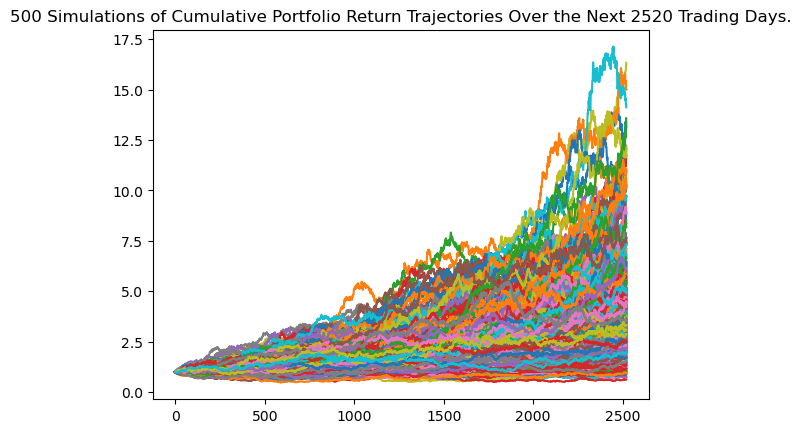

In [77]:
# Visualize the 10-year Monte Carlo simulation by creating an
# overlay line plot
# YOUR CODE HERE
SPY_AGG_10year_plot = SPY_AGG_10year.plot_simulation()

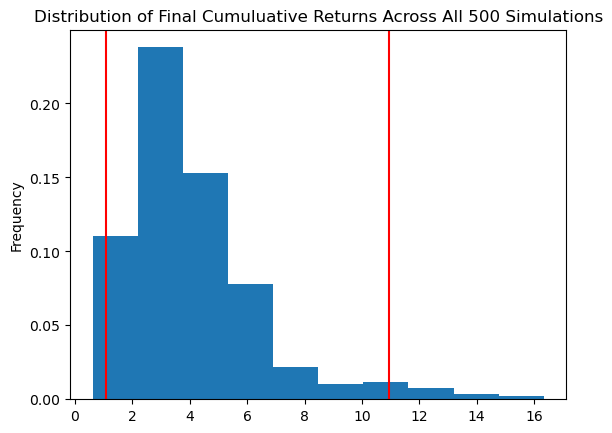

In [78]:
# Visualize the probability distribution of the 10-year Monte Carlo simulation 
# by plotting a histogram
# YOUR CODE HERE
SPY_AGG_10year_dist_plot = SPY_AGG_10year.plot_distribution()

In [79]:
# Generate summary statistics from the 10-year Monte Carlo simulation results
# Save the results as a variable
# YOUR CODE HERE
mc_summary_statistic = SPY_AGG_10year.summarize_cumulative_return()

# Review the 10-year Monte Carlo summary statistics
# YOUR CODE HERE
mc_summary_statistic

count           500.000000
mean              4.049333
std               2.385353
min               0.619858
25%               2.483351
50%               3.541100
75%               4.895315
max              16.333515
95% CI Lower      1.070275
95% CI Upper     10.947304
Name: 2520, dtype: float64

### Answer the following questions:

#### Question: Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the new Monte Carlo simulation, what are the lower and upper bounds for the expected value of the portfolio (with the new weights) with a 95% confidence interval?

In [82]:
# Print the current balance of the stock and bond portion of the members portfolio
# YOUR CODE HERE
print(f' The current balance of the stock and bond portion of the members portfolio is: ${savings_df.loc["stock/bond"].values[0]:.3f}')

 The current balance of the stock and bond portion of the members portfolio is: $169401.889


In [87]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for 
# the current stock/bond portfolio
ci_lower_ten_cumulative_return = mc_summary_statistic[8] * savings_df.loc["stock/bond"].values[0]
ci_upper_ten_cumulative_return = mc_summary_statistic[9] * savings_df.loc["stock/bond"].values[0]

# Print the result of your calculations
# YOUR CODE HERE
print(f"The range of the possible outcomes for the current stock/bond portfolio will end within in the range of\
 {ci_lower_ten_cumulative_return:.3f} and {ci_upper_ten_cumulative_return:.3f}.")

The range of the possible outcomes for the current stock/bond portfolio will end within in the range of 181306.673 and 1854493.909.
